In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-5):
        """
        勾配降下法の初期化

        Args:
            f (callable): 最適化対象の関数
            df (callable): 最適化対象の関数の導関数
            alpha (float, optional): 学習率. Defaults to 0.01.
            eps (float, optional): 収束判定の閾値. Defaults to 1e-5.
        """
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
    
    def solve(self, init):
        """
        勾配降下法を用いた最適化を行う

        Args:
            init (np.ndarray): 初期値
        """
        x = init
        path = []
        
        grad = self.df(x)
        path.append(x)

        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        
        self.path_ = np.array(path)
        self.x_ = x # 最適解
        self.opt_ = self.f(x) # 最適値

In [9]:
def f(xx):
    """最適化したい関数"""
    x, y = xx
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    """最適化したい関数の導関数"""
    x, y = xx
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

In [10]:
algo = GradientDescent(f, df)
initial = np.array([1,1])
algo.solve(initial)

print("最適解:", algo.x_)
print("最適値:", algo.opt_)

最適解: [3.44110012e-06 1.00000477e+00]
最適値: -2.999999999970986


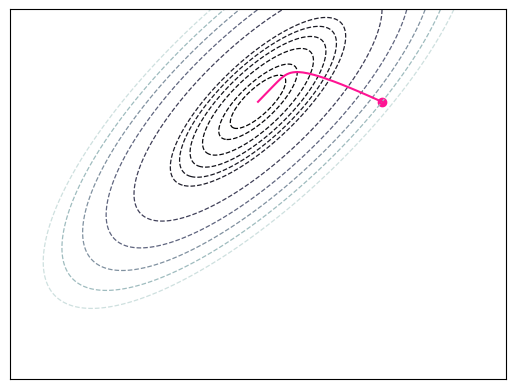

In [11]:
plt.tick_params(
        labelbottom=False, labelleft=False, labelright=False, labeltop=False, # 軸目盛りラベルを消す
        bottom=False, left=False, right=False, top=False) # 軸目盛り線を消す

# 等高線の描画
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)

xmesh, ymesh = np.meshgrid(xs, ys)

xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]

levels = [
    -3, -2.9, -2.8, -2.6, -2.4,
    -2.2, -2, -1, 0, 1, 2, 3, 4
]

plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, cmap="bone", linewidths=0.9, linestyles='dashed')

# 収束までの点の移動の描画
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="deeppink", linewidth=1.5)

# 始点の描画
plt.scatter(initial[0], initial[1], color='deeppink', marker="o")

plt.savefig('gradient-descent.png', dpi=300, bbox_inches="tight")

<>:37: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\e'
/var/folders/qg/78585g_s6vs84dlwpvbd2klm0000gn/T/ipykernel_8661/1752921606.py:37: SyntaxWarning: invalid escape sequence '\e'
  ax[i].set_title(f"$\eta$={alphas[i]}")
/var/folders/qg/78585g_s6vs84dlwpvbd2klm0000gn/T/ipykernel_8661/873469793.py:31: RuntimeWarning: overflow encountered in square
  while (grad**2).sum() > self.eps**2:
/var/folders/qg/78585g_s6vs84dlwpvbd2klm0000gn/T/ipykernel_8661/3287764850.py:9: RuntimeWarning: overflow encountered in scalar subtract
  return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])
/var/folders/qg/78585g_s6vs84dlwpvbd2klm0000gn/T/ipykernel_8661/873469793.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - self.alpha * grad


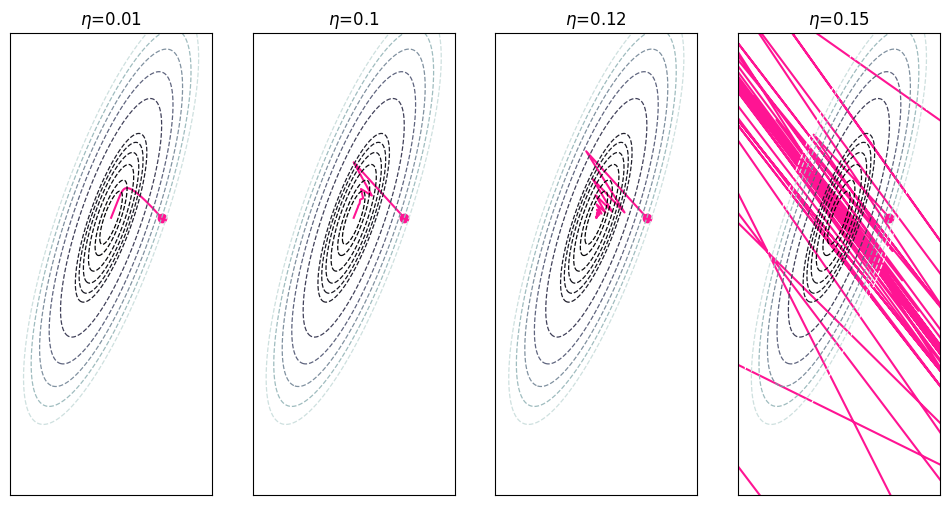

In [12]:
# 学習率を変えてみる

algos = []
initial = np.array([1,1])
alphas = [0.01, 0.1, 0.12, 0.15]

for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(initial)
    algos.append(algo)
    
# 描画して結果を比較

xmin,xmax = -2, 2
ymin,ymax = -2, 3

xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)

xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]

levels = [
    -3, -2.9, -2.8, -2.6, -2.4,
    -2.2, -2, -1, 0, 1, 2, 3, 4
]

fig, ax = plt.subplots(1,len(algos), figsize=(12.0, 6.0))

for i in range(len(algos)):
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    
    ax[i].tick_params(
        labelbottom=False, labelleft=False, labelright=False, labeltop=False, # 軸目盛りラベルを消す
        bottom=False, left=False, right=False, top=False) # 軸目盛り線を消す
    ax[i].set_title(f"$\eta$={alphas[i]}")
    
    # 始点の描画
    ax[i].scatter(initial[0], initial[1], color='deeppink', marker="o")
    
    # 収束までの点の移動の描画
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color="deeppink", linewidth=1.5)
    
    # 等高線の描画
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, cmap="bone", linewidths=0.9, linestyles='dashed')

plt.savefig('gradient-descent_compare-alpha.png', dpi=300, bbox_inches="tight")